<a href="https://colab.research.google.com/github/rogerioMB-hub/google_colab/blob/main/Deep03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [29]:
# criando um dataset para classificação.
#     500 amostras
n_pts = 500
# grupos concentricos, alguns mais proximos do centro, outros 20% mais distantes.
# além dos pontos (pts_), a função gera um tensor contendo os labels (labels_) de cada ponto, ou seja,
# se pertencente ao conjunto 0 ou conjunto 1
pts_, labels_ = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)

In [30]:
# plotar os pontos com labels 0 em azul e com labels 1 em verde
def scatter_plot():
  plt.scatter(pts_[labels_==0, 0], pts_[labels_==0,1], c="blue")
  plt.scatter(pts_[labels_==1, 0], pts_[labels_==1,1], c="green")
  plt.show()

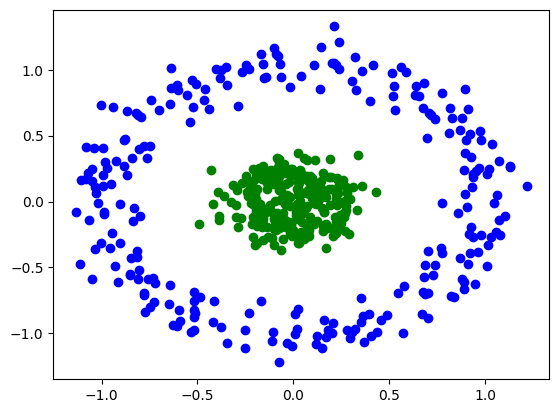

In [31]:
scatter_plot()

In [32]:
# os dados, para uso em redes neurais devem ser apresentados na forma de tensores
pts_data = torch.Tensor(pts_)
labels_data = torch.Tensor(labels_)

# Os pontos não podem ser separados por uma função linear, logo devemos criar uma rede contendo além da camada input e a camada output, algumas camadas intermediárias, ou escondidas (hidden).

In [33]:
class Net(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super(Net, self).__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)

  # aplica a função de ativação sobre a função ou modelo linear proposto
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    pred = torch.sigmoid(self.linear2(x))
    return pred


# Criando um modelo com base na classe NET() - 2 entradas, 4 neuronios intermediários e uma saída

Temos duas informações de entrada e apenas uma informação de saída. Entre as camadas de entrada (2 vairáveis) e saída (1 variável), temos uma camada intermediária (4 variáveis).

In [34]:
torch.manual_seed(2)
modelo = Net(2, 4, 1)

In [35]:
# mostrar modelo
print(list(modelo.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [36]:
criterion = nn.BCELoss()  # binary cross entropy
optimizer = torch.optim.Adam(modelo.parameters(), lr=0.1)

In [37]:
epochs = 1000  #
losses = []   #
for i in range(epochs):
  y_pred = modelo.forward(pts_data)
  loss = criterion(y_pred[:,0], labels_data)  # o tensor y_pred apresenta dimensao diferente,
                                              # do labels_data, logo modifiquei para ficar equivalente
  # ou poderia fazer isso:
  # labels_data = torch.Tensor(labels_).reshape(100,1)
  losses.append(loss.item())
  #print(f"Epoch {i+1}: {loss.item()}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'Epoch')

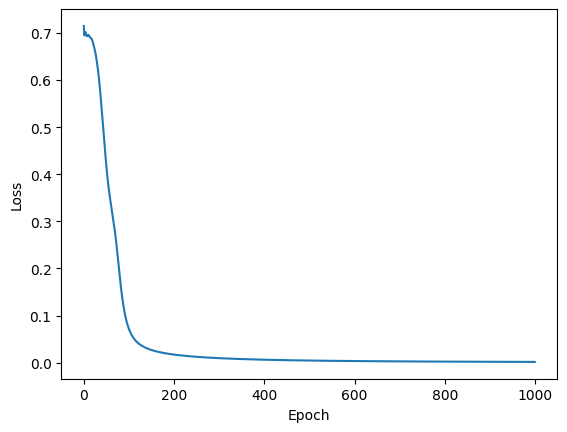

In [38]:
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

Observar que Lr do modelo foi alterada de 0.01 para 0.1 visto que o sistema convergiu lentamente.

In [39]:
def plot_decision_boundary(P, L):
  x_span = np.linspace(min(P[:,0])-.25, max(P[:,0])+.25)
  y_span = np.linspace(min(P[:,1])-.25, max(P[:,1])+.25)
  xx, yy = np.meshgrid(x_span, y_span)  # cria uma matriz de pontos
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  #print(grid.shape)
  pred_func = modelo.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

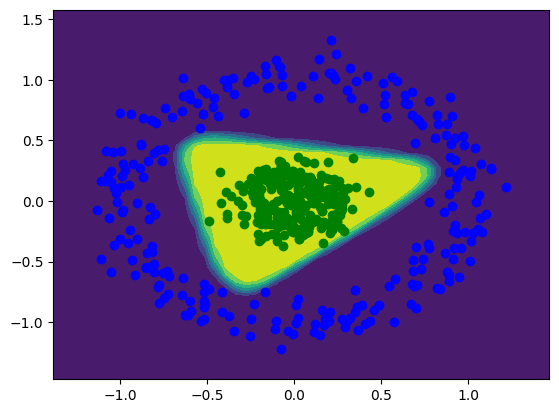

In [40]:
plot_decision_boundary(pts_, labels_)
scatter_plot()

O pto vermelho tem prob.  0.9996596574783325 de ser do grupo 1
O pto laranja tem prob.  0.0012103538028895855 de ser do grupo 1


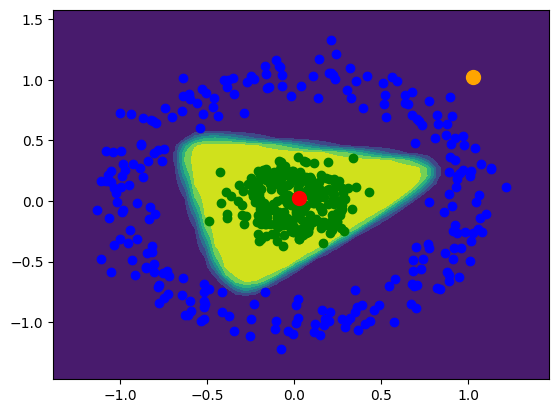

In [41]:
x = .025
y = .025
point1 = torch.Tensor([[x,y]])
pred = modelo.forward(point1)
print("O pto vermelho tem prob. ",pred.item(), "de ser do grupo 1")
plt.plot(x,y, marker='o', markersize=10, color="red")

x = 1.025
y = 1.025
point2 = torch.Tensor([[x,y]])
pred = modelo.forward(point2)
print("O pto laranja tem prob. ",pred.item(), "de ser do grupo 1")
plt.plot(x,y, marker='o', markersize=10, color="orange")


plot_decision_boundary(pts_, labels_)
scatter_plot()